In [222]:
# Pytorch Autograd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [223]:
# Lets create some tensors, requires grad tells pytorch that we want to store the gradient for this tensor
x = torch.FloatTensor([4])
x.requires_grad = True
w = torch.FloatTensor([2])
w.requires_grad = True
b = torch.FloatTensor([3])
b.requires_grad = True

# By performing a simple computation Pytorch will bui;d a computational graph
y = w * x + b

# It's easy to see that
# dy/dx = w = 2
# dy/dw = x = 4
# dy/db = 1

# Compute gradient via Pytorch Autograd
y.backward()

# Print calculated gradients
print("dy/dx", x.grad.item())
print("dy/dw", w.grad.item())
print("dy/db", b.grad.item())


dy/dx 2.0
dy/dw 4.0
dy/db 1.0


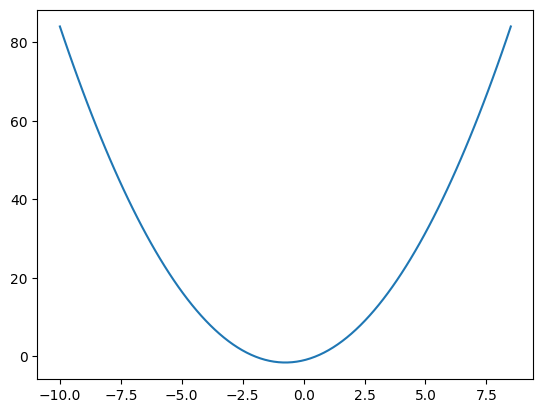

In [224]:
# Finding minimum value of a function

# Lets define an equation as a lambda function
fx = lambda x: x ** 2 + 1.5 * x - 1

x = np.linspace(-10, 8.5, 100)

plt.plot(x, fx(x))

In [225]:
# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Lets use Pytorch Auograd to find the gradient at point x
y_ = fx(x_)
y_.backward()

# The gradient tells us the direction to travel to increase Y
dy_dx = x_.grad.item()
print("dy/dx is %.2f when x is %.2f " % (dy_dx, x_))

dy/dx is -1.39 when x is -1.44 


In [226]:
# Lets take some steps to decent the gradient

#Create a random point x
x = torch.randn(1)
x.requires_grad = True

# Create some loggers
x_logger = []
y_logger = []

# We'll keep track of how may steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.1

# Initialize the gradient to a large value
dy_dx_ = 1000

# We'll kimit max number of steps so we don't create infinite loop
max_num_steps = 100

# Keep taking steps until the gradient is small
while np.abs(dy_dx_) > 0.0001:
    # Get the Y point at the current x value
    y_ = fx(x_)

    # Calculate the gradient at this point
    y_.backward()
    dy_dx_ = x_.grad.item()

    # Pytorch will not keep track of operations within a torch.no_grad() block
    # We don't want Pytorch to add our gradient decent step to the computational graph
    with torch.no_grad():
        # Take a step down (decent) the curve
        x_ -= learning_rate * dy_dx_

        # Pytorch will accumulate the gradient over multiple backward passes
        # For our use case we don;t want this to happpen so we need to set it to zero
        # After we have used it
        x_.grad.zero_()

        # Log the x and y points to plot
        x_logger.append(x_.item())
        y_logger.append(y_.item())

    counter += 1

    if counter == max_num_steps:
        break

print("y minimum is %.2f and is when x is %.2f, found after %d steps" % (y_.item(), x_.item(), counter))

y minimum is -1.56 and is when x is -0.75, found after 43 steps


In [227]:
# Model and Optimizers

class SimpleFunction(nn.Module):
    """
    Simple implementation of an
    """
    def __init__(self):
        # Pass our class and self into super class and call super class's init function
        super(SimpleFunction, self).__init__()

    def forward(self, x):
        return x * 4 + 2
    

In [228]:
# Create an instance of our class
simple_function = SimpleFunction()

# Perform a 'forward pass' of our class
output = simple_function(10)
print("Class output:", output)

# Note we do NOT need to explicity call the forward function of our class
# A forward passof our models is such a common step that Pytorch makes it easier and cleaner for us to do


Class output: 42


In [229]:
# A more complicated model
class LinearModel(nn.Module):
    """
    Takes the input x and returns x * w ^ t + b
    """
    def __init__(self, input_size, output_size):
        # Pass our class and self to superclass and call superclass init function
        super(LinearModel, self).__init__()
        # nn.Parameter wraps our normal tensor and tells Pytorch that they are our nn.Module's model parameters to be optimized
        self.w = nn.Parameter(torch.randn(output, input_size))
        self.b = nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        return torch.matmul(x, self.w.t()) + self.b


In [230]:
# Create a batch of 10 datapoints each 50
input_data = torch.randn(10, 5)

# Create an instance of our Model
linear_model = LinearModel(5, 1)

# Perform a foward pass!
output = linear_model(input_data)

print(input_data.shape)
print(output.shape)
print(output.detach())

torch.Size([10, 5])
torch.Size([10, 42])
tensor([[-1.1578e+00, -1.9871e+00, -1.1574e+00, -3.1666e+00, -1.6527e+00,
          2.0281e+00, -2.8407e-02, -1.6718e+00, -2.3109e-01,  1.5690e+00,
         -2.3791e+00, -1.7603e+00, -2.3387e+00, -2.9389e+00, -8.4891e-01,
         -2.8859e+00,  1.9395e-02, -2.7078e+00, -2.2205e+00, -2.9394e+00,
         -2.0638e+00, -1.2516e+00, -4.7263e-01, -4.3304e+00, -4.0711e+00,
         -9.3650e-01,  3.9105e+00, -8.2905e-01, -1.7154e+00, -2.8569e+00,
          2.2479e+00, -1.6811e+00, -1.3552e+00, -4.7360e-01, -2.2836e+00,
         -2.1839e+00,  9.6105e-01, -1.8441e+00, -1.7692e+00,  7.6555e-01,
         -1.0211e+00, -9.6051e-01],
        [-2.8735e+00, -2.3340e+00, -5.6067e+00,  4.0181e+00, -2.5649e+00,
         -3.5735e+00, -1.7992e+00, -1.0975e+00, -2.7058e+00, -5.2638e+00,
          1.1081e+00, -5.3024e-01,  7.0224e-01,  5.6011e-01, -1.1635e+00,
         -1.0070e-01, -7.4685e+00,  2.2239e-01, -2.8680e+00,  2.4616e+00,
          2.5840e+00, -2.9778e+00, 

In [231]:
# Pytorch inbuilt Neural Network Layers

# Build a linear layer aka 'fully connected' layer aka a 'Perceptron' layer
# nn.Linear(Number of inputs, Number of outputs)
linear = nn.Linear(3, 1)

# Lets have a look at the parameters of this layer
# The 'weights' are what is multiplied by the input data
print("w:", linear.weight.data)
print("w shape:", linear.weight.data.shape)

# The bias is then added on
print("b:", linear.bias.data)
print("b shape:", linear.bias.data.shape)

# Note: .data jist gives us the raw tensor without any connection to the computational graph
#   It looks nicer when we print it out
# Note: The operation the linear layer perfoms is y = x*S^t + b
#   Where A^t is the transpose of the weights and b is the bias
#   This operation is also known as 'affine transpose'1.ipynb

w: tensor([[ 0.5011, -0.1797,  0.0813]])
w shape: torch.Size([1, 3])
b: tensor([0.1183])
b shape: torch.Size([1])


In [232]:
# Lets have a look at the gradient of these parameters
print("w grad:", linear.weight.grad)
print("b grad:", linear.bias.grad)
# Note: Pytorch initializes the grad of the tensor to None and not 0
# They only get created after the first backward pass

w grad: None
b grad: None


In [233]:
# Create a random data input tensor
data = torch.randn(100, 3)

# Create some noisy target
target = data.sum(1, keepdim=True) + 0.01 * torch.randn(data.shape[0], 1)
print("Input data:", data[:10])
print("Output:", target[:10])

Input data: tensor([[ 1.2249, -2.6706,  1.5788],
        [ 1.2026, -0.5438, -0.7685],
        [ 2.5211,  1.4738,  1.6794],
        [ 0.7343,  0.1262, -0.8847],
        [ 1.3350, -1.1994,  0.1837],
        [-0.9936, -0.7579, -0.7000],
        [-2.3605,  0.3177, -0.1399],
        [ 1.7992,  0.7961, -0.2439],
        [ 1.6099, -1.1216, -0.8644],
        [ 0.7323, -0.6875,  0.0817]])
Output: tensor([[ 0.1277],
        [-0.1222],
        [ 5.6861],
        [-0.0217],
        [ 0.3287],
        [-2.4553],
        [-2.1916],
        [ 2.3572],
        [-0.3740],
        [ 0.1327]])


In [234]:
# Remeber! To perform a forward pass of our model, we just need to call our network
# Pytorch's nn.Module class will automatically pass it to the 'forward' function in the layer class
target_pred = linear(data)
print("Network output:", target_pred.data[:10])
print("Network output shape:", target_pred.data.shape)


Network output: tensor([[ 1.3404],
        [ 0.7562],
        [ 1.2535],
        [ 0.3916],
        [ 1.0177],
        [-0.3004],
        [-1.1332],
        [ 0.8571],
        [ 1.0562],
        [ 0.6154]])
Network output shape: torch.Size([100, 1])


In [235]:
# Loss Function and Optimizer

# Lets perform a reggression with a mean square error loss
loss_function = nn.MSELoss()

# Lets create a Stochastic gradient descent optimizer with a learning rate of 0.01
# The way we will be using it is just normal GD
# When we create the optimizer we need to tell it what it need to optimizem so the first thing is to pass the linear layer's parameters
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

Text(0, 0.5, 'Outputs')

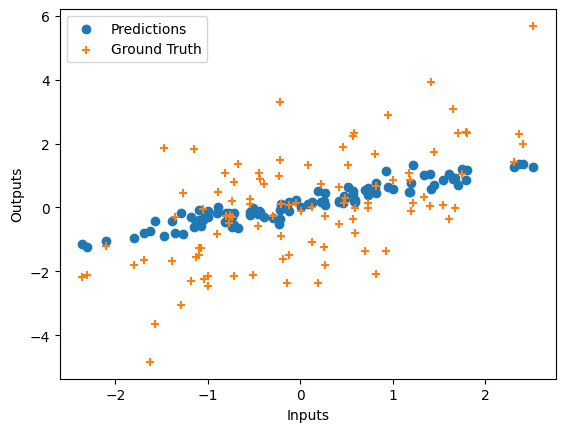

In [236]:
# Plotting the first dimension of the input vs the output

# Use the outputs of the model from a few cells ago
plt.scatter(data[:,0], target_pred.detach())

# Use ground truth data
plt.scatter(data[:,0], target, marker='+')
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Outputs")

In [237]:
loss = loss_function(target_pred, target)
print("loss:", loss.item())

loss: 2.3682165145874023


In [238]:
# Backward pass
loss.backward()

# Print out the gradient
print("dL/dw:", linear.weight.grad)
print("dL/db:", linear.bias.grad)

# Note for every backwards pass of the model we must first perform a forward pass
# As data from parts of the computational graph have been deleted upon the backward pass to save memory
# We can tell Pytorch to hold this data but in many cases it needs to be recalculated anyway

dL/dw: tensor([[-0.9162, -2.4629, -1.4642]])
dL/db: tensor([0.2271])


In [239]:
# The critical step to update the parameter which reduce the loss
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print("loss after 1 step optimizer:", loss.item())

loss after 1 step optimizer: 2.278095006942749


In [240]:
# Training loop

# Lets create an empty list to log the losses
loss_logger = []

# Lets perform 100 iterations of our dataset
for i in range(1000):
    # Perform a foward pass of our data
    target_pred = linear(data)

    # Calculate the loss
    loss = loss_function(target_pred, target)

    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be add to the Gradients from previous steps
    optimizer.zero_grad()

    # Calculate the new gradients
    loss.backward()

    # Perform an optimization step
    optimizer.step()

    loss_logger.append(loss.item())

print("loss:", loss.item())

loss: 7.316730625461787e-05


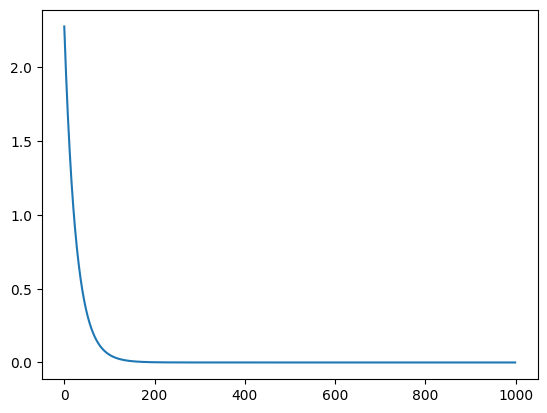

In [241]:
# Lets graph the loss
plt.plot(loss_logger)

Text(0, 0.5, 'Outputs')

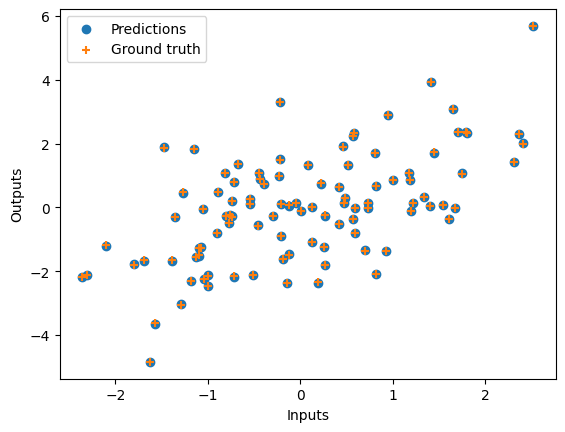

In [242]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:,0], target_pred.detach())
plt.scatter(data[:,0], target, marker="+")
plt.legend(["Predictions", "Ground truth"])
plt.xlabel("Inputs")
plt.ylabel("Outputs")